In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df = pd.read_csv("loan_data.csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [6]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [7]:
# checking for duplicate data, if any
df[df.duplicated()].count()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
# summary of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [10]:
df['loan_status'].value_counts(normalize=True)

loan_status
0    0.777778
1    0.222222
Name: proportion, dtype: float64

In [11]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [12]:
df.select_dtypes(include=['float64']).head()

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,22.0,71948.0,35000.0,16.02,0.49,3.0
1,21.0,12282.0,1000.0,11.14,0.08,2.0
2,25.0,12438.0,5500.0,12.87,0.44,3.0
3,23.0,79753.0,35000.0,15.23,0.44,2.0
4,24.0,66135.0,35000.0,14.27,0.53,4.0


EDA

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

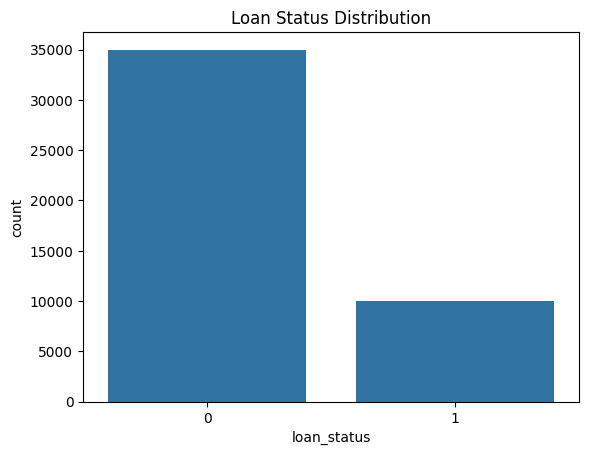

In [14]:
# visualizing target variable
sns.countplot(x='loan_status', data=df)
plt.title("Loan Status Distribution")
plt.show()

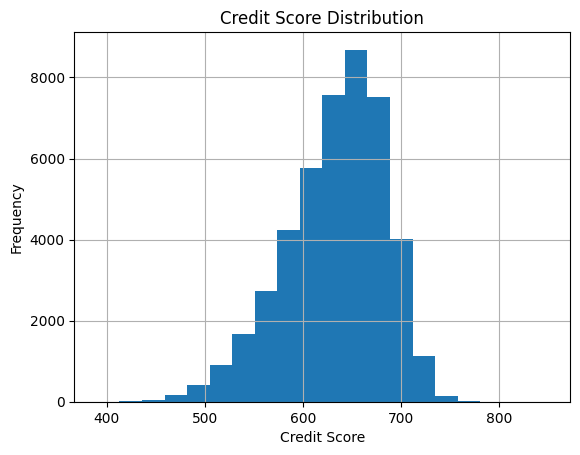

In [15]:
df['credit_score'].hist(bins= 20)
plt.title("Credit Score Distribution")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.show()
# bins means number of intervals (bars)
# The entire credit score range is divided into 30 equal parts

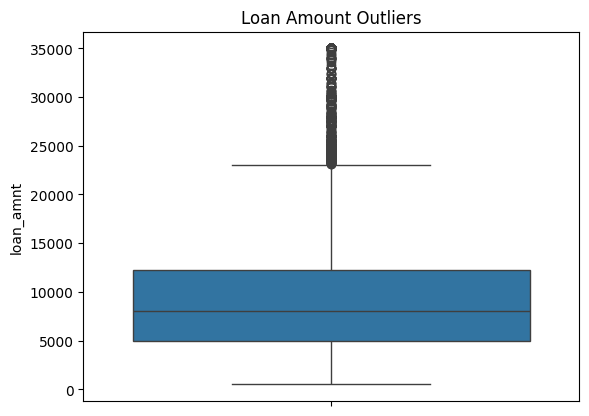

In [16]:
sns.boxplot(y='loan_amnt', data=df)
plt.title("Loan Amount Outliers")
plt.show()

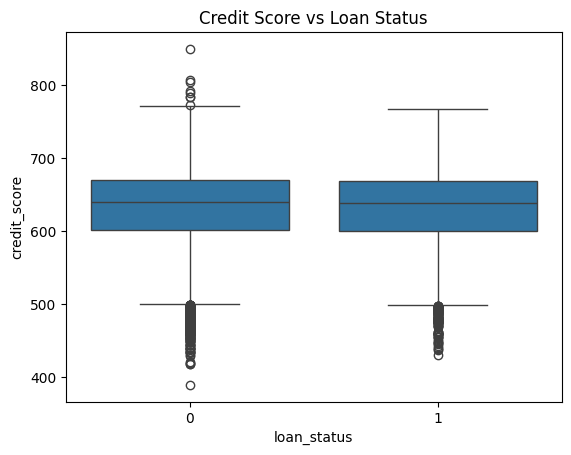

In [17]:
sns.boxplot(x='loan_status', y='credit_score', data=df)
plt.title("Credit Score vs Loan Status")
plt.show()

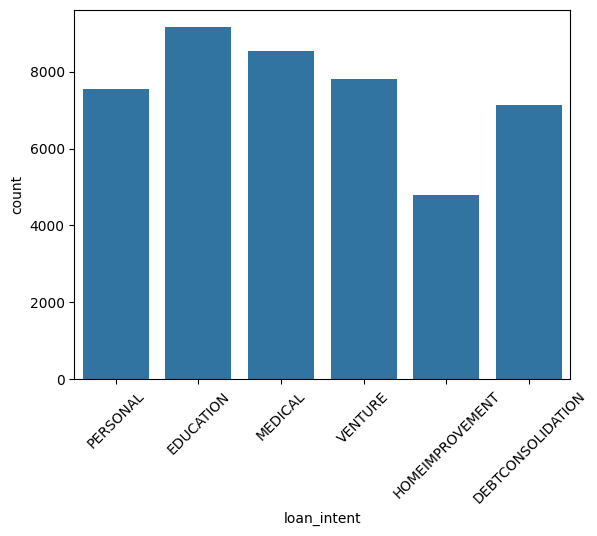

In [18]:
sns.countplot(x='loan_intent',data = df)
plt.xticks(rotation=45)
plt.show()

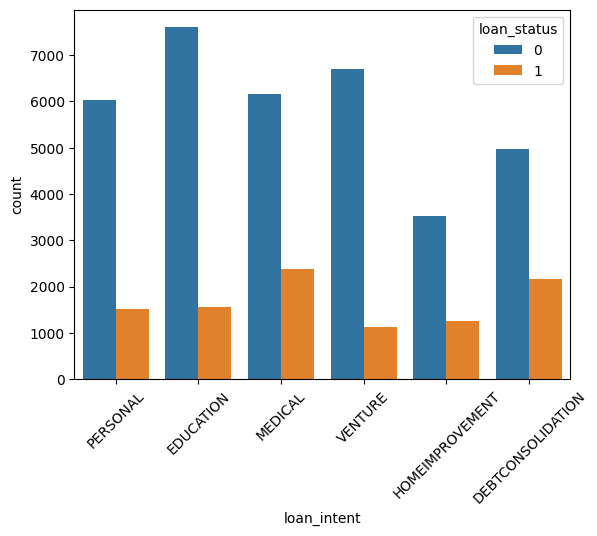

In [19]:
sns.countplot(x='loan_intent', hue='loan_status', data=df)
plt.xticks(rotation=45)
plt.show()

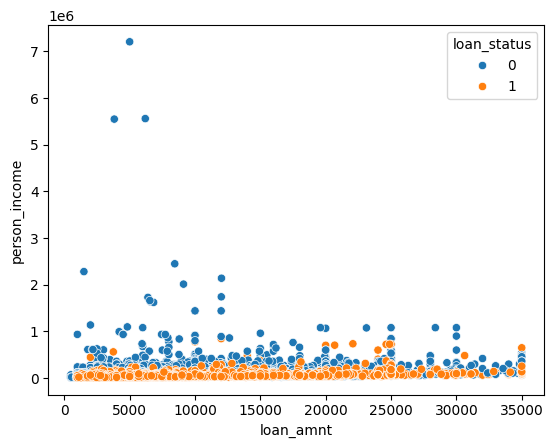

In [20]:
sns.scatterplot(x='loan_amnt', y='person_income', hue='loan_status', data=df)
plt.show()
# here loan amount increases than person income also increases
# low income applicants rarely get very high loan
# low income -> higher default risk
# 0 means paid loan
# 1 means not paid

In [21]:
df[['loan_amnt', 'person_income']].corr()
# Correlation values range from -1 to +1
# +1 → strong positive relationship
# 0 → no relationship
# -1 → strong negative relationship
# 👉 0.24229 ≈ weak positive correlation

,loan_amnt,person_income
loan_amnt,1.00000,0.24229
person_income,0.24229,1.00000


In [22]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()
df['person_gender'] = Label_Encoder.fit_transform(df['person_gender'])
df['person_education'] = Label_Encoder.fit_transform(df['person_education'])
df['person_home_ownership'] = Label_Encoder.fit_transform(df['person_home_ownership'])
df['loan_intent'] = Label_Encoder.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = Label_Encoder.fit_transform(df['previous_loan_defaults_on_file'])

In [23]:
# import pandas as pd
# df_encoded = pd.get_dummies(
#     df,
#     columns=['person_gender', 'person_education', 'person_home_ownership', 
#              'loan_intent','previous_loan_defaults_on_file'],
#     drop_first=True
# )

In [24]:
# Separate numerical & categorical columns
# num_cols = x.select_dtypes(include=["int64", "float64"]).columns
# cat_cols = x.select_dtypes(include=["object"]).columns
# print("Numerical Columns:", list(num_cols))
# print("Categorical Columns:", list(cat_cols))

In [25]:
# from sklearn.preprocessing import OneHotEncoder

# ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# encoded = ohe.fit_transform(df[['loan_intent']])
# encoded = ohe.fit_transform(df[['person_education']])
# encoded = ohe.fit_transform(df[['loan_intent']])
# encoded = ohe.fit_transform(df[['loan_intent']])
# encoded = ohe.fit_transform(df[['loan_intent']])

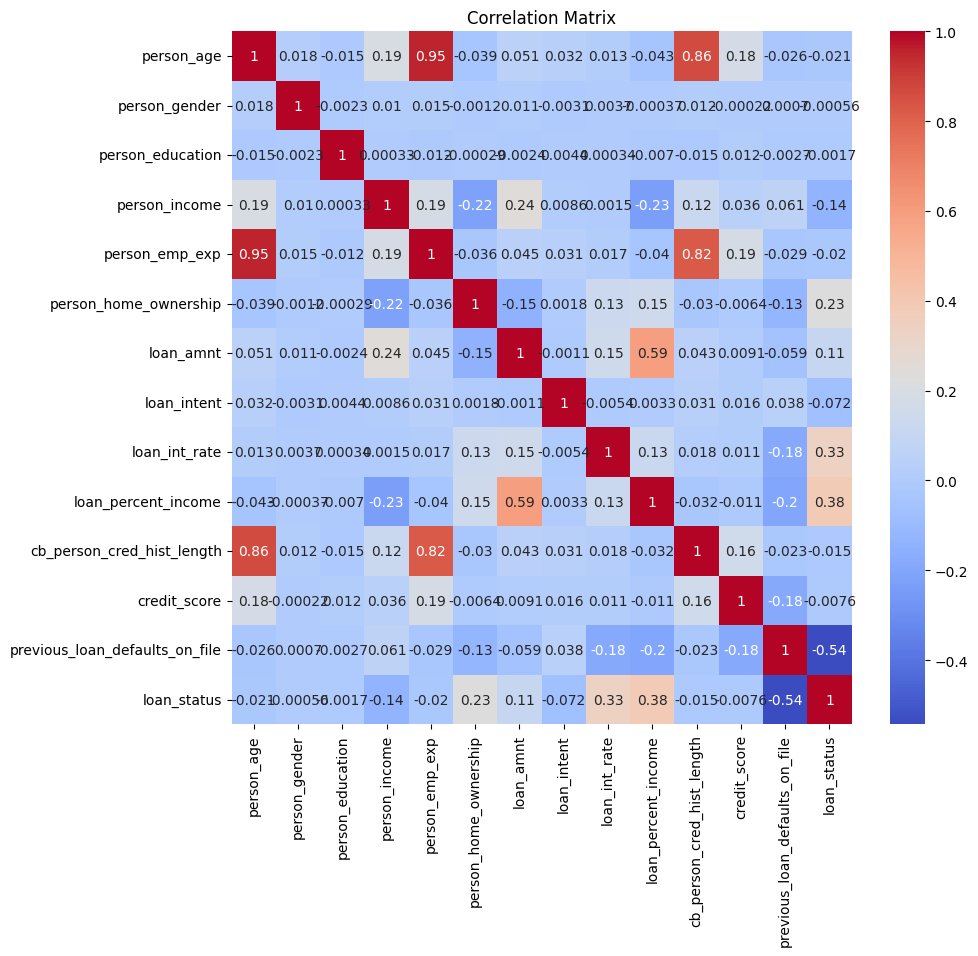

In [26]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Red (positive) → as one feature increases, the other also increases
# Blue (negative) → as one increases, the other decreases
# White / light colors → weak or no relationship
# Values range from -1 to +1

# Best features to KEEP
# loan_percent_income
# loan_int_rate
# credit_score
# previous_loan_defaults_on_file
# person_income
# credit history length

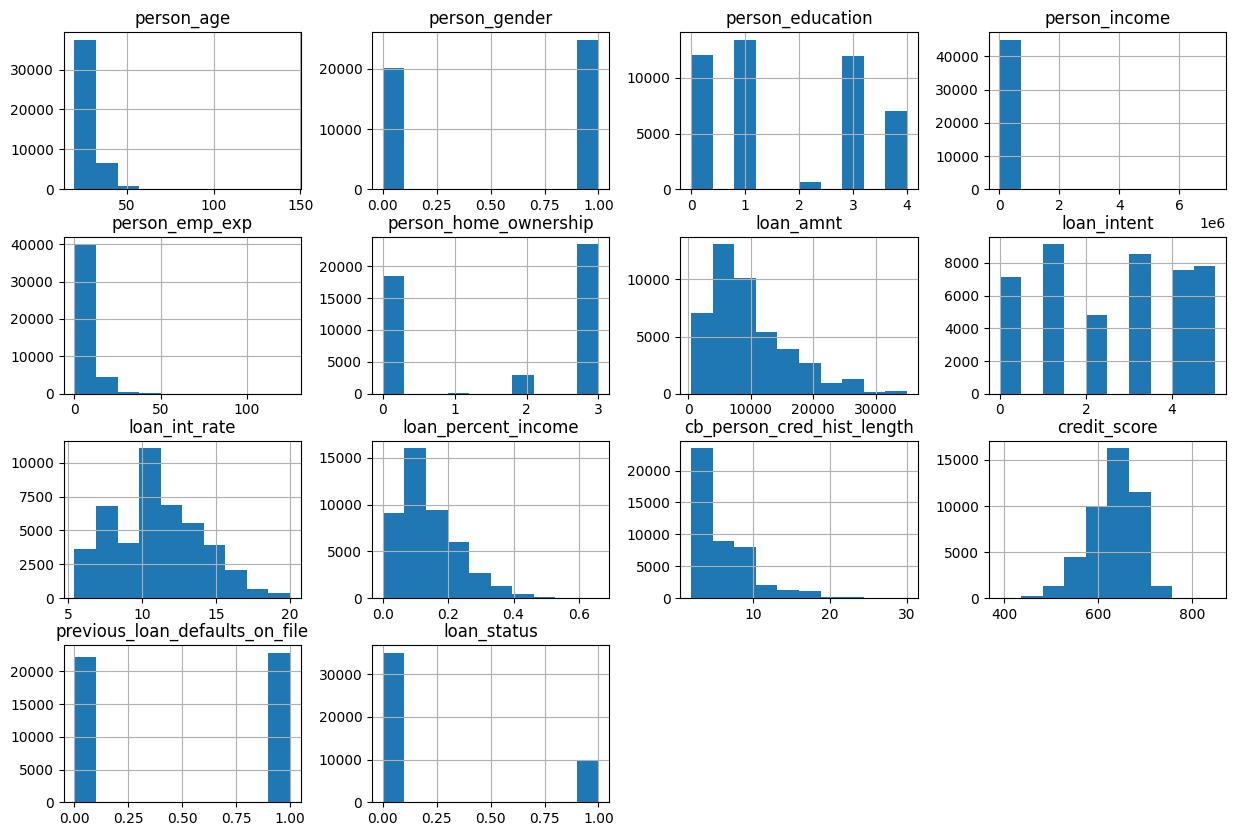

In [27]:
df.select_dtypes(include=['int64','float64']).hist(figsize=(15,10))
plt.show()

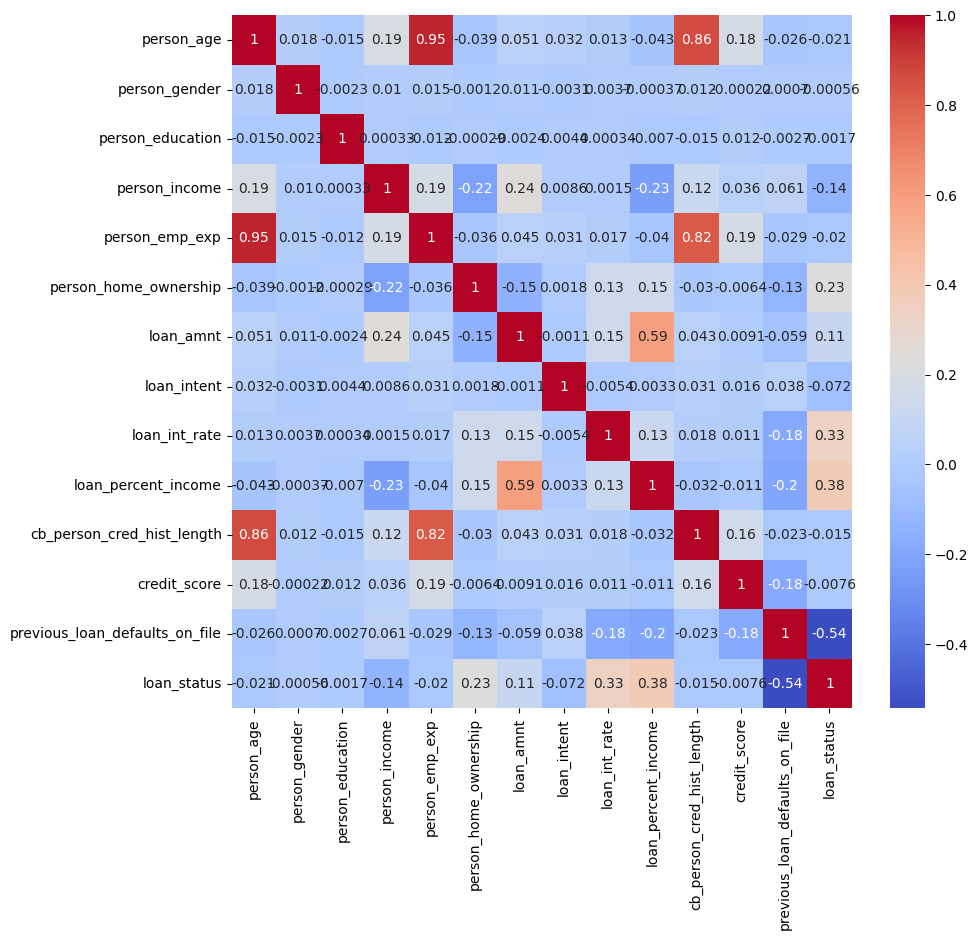

In [28]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

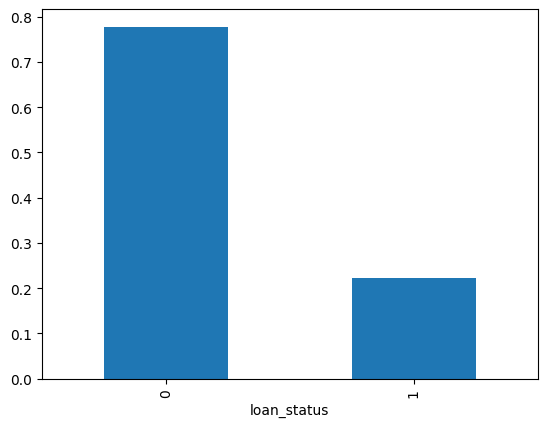

In [29]:
df['loan_status'].value_counts(normalize=True).plot(kind='bar')
plt.show()
# helps detect class imbalance

<Axes: xlabel='loan_status', ylabel='credit_score'>

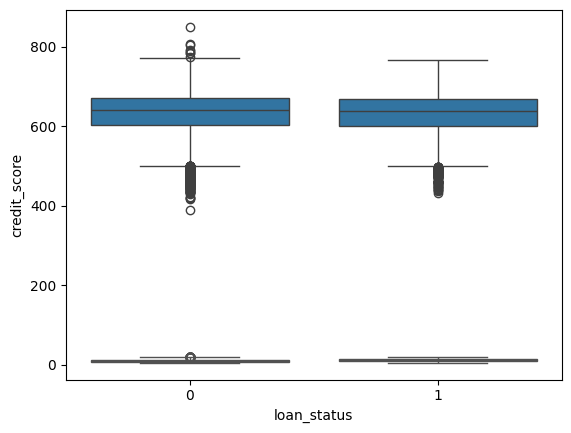

In [30]:
sns.boxplot(x='loan_status', y='credit_score', data=df)
sns.boxplot(x='loan_status', y='loan_int_rate', data=df)

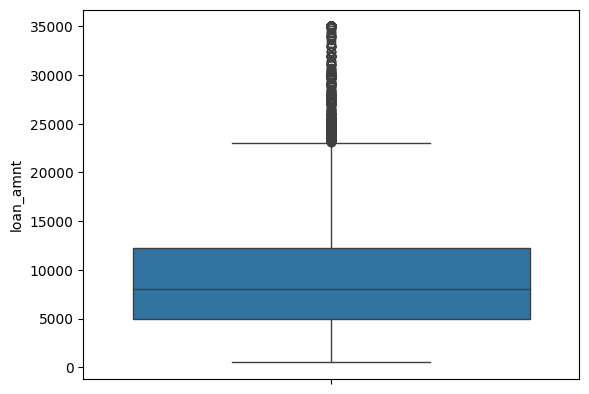

In [31]:
sns.boxplot(df['loan_amnt'])
plt.show()

In [32]:
# splitting the dataet into features and target
x = df.drop('loan_status',axis = 1)
y= df['loan_status']
print(f"The shape of features is :{x.shape}")
print(f"The shape of target is :{y.shape}")

The shape of features is :(45000, 13)
The shape of target is :(45000,)


In [33]:
# from sklearn.preprocessing import StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ("num", StandardScaler(), num_cols),
#         ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
#     ]
# )

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.20)
# print the shape of training and testing datasets
print(f"The shape of x_train is: ,{x.shape}")
print(f"The shape of x_test is: ,{x.shape}")
print(f"The shape of y_train is: ,{y.shape}")
print(f"The shape of y_test is: ,{y.shape}")

The shape of x_train is: ,(45000, 13)
The shape of x_test is: ,(45000, 13)
The shape of y_train is: ,(45000,)
The shape of y_test is: ,(45000,)


In [35]:
# X_train_processed = preprocessor.fit_transform(x_train)
# X_test_processed = preprocessor.transform(x_test)
# All categorical columns → One-Hot numeric
# All numerical columns → scaled
# Output → NumPy array / sparse matrix

In [36]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# model = Pipeline(steps=[
#     ("preprocessing", preprocessor),
#     ("classifier", LogisticRegression(max_iter=1000))
# ])

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=100)
lr.fit(x_train,y_train)
from sklearn.metrics import accuracy_score, classification_report
print("logistic regression accuracy ")
y_pred = lr.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

logistic regression accuracy 
Accuracy: 0.8273333333333334
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      6990
           1       0.77      0.32      0.46      2010

    accuracy                           0.83      9000
   macro avg       0.80      0.65      0.68      9000
weighted avg       0.82      0.83      0.80      9000



In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion="gini")
# max_depth=10)
#     min_samples_split=10,
#     min_samples_leaf=5,
#     random_state=42,
#     n_jobs=-1)

In [39]:
rf = rf.fit(x_train,y_train)

In [40]:
print("random forest accuracy ")
y_pred = rf.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

random forest accuracy 
Accuracy: 0.9276666666666666
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      6990
           1       0.89      0.77      0.83      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.87      0.89      9000
weighted avg       0.93      0.93      0.93      9000



In [41]:
y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Trainig Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 1.00000
Trainig Accuracy: 0.92767


In [42]:
from xgboost import XGBClassifier
xg = XGBClassifier(n_estimators=500,
                   learning_rate=0.5,
                   max_depth = 5,
                   eval_metric='logloss',
                   random_state=42)

In [43]:
xg.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [44]:
# from sklearn.metrics import accuracy_score, classification_report
print("xg boost accuracy ")
y_pred = xg.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

xg boost accuracy 
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      6990
           1       0.87      0.81      0.84      2010

    accuracy                           0.93      9000
   macro avg       0.91      0.89      0.90      9000
weighted avg       0.93      0.93      0.93      9000



In [45]:
y_pred_train = xg.predict(x_train)
y_pred_test = xg.predict(x_test)
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Trainig Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.99992
Trainig Accuracy: 0.93000


In [46]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [4, 6],
    'n_estimators': [200, 300],
    'learning_rate': [0.05, 0.1]
}
grid = GridSearchCV(
    XGBClassifier(eval_metric='logloss'),
    param_grid,
    scoring='recall',
    cv=3,
    n_jobs=-1
)
grid.fit(x_train, y_train)
best_model = grid.best_estimator_
# Parameters are chosen systematically
# Based on data, not intuition

In [47]:
y_pred_train = grid.predict(x_train)
y_pred_test = grid.predict(x_test)
print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
print("Trainig Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

Trainig Accuracy: 0.96914
Trainig Accuracy: 0.93533


In [48]:
y_pred = best_model.predict(x_test)
from sklearn.metrics import accuracy_score, recall_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.9353333333333333
Recall: 0.8044776119402985
classification Report:               precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.90      0.80      0.85      2010

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000



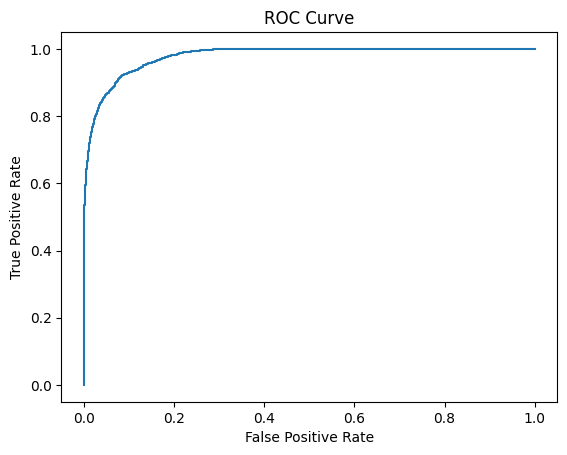

AUC: 0.9785039751172606


In [49]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_prob = grid.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()
print("AUC:", roc_auc_score(y_test, y_prob))

In [50]:
final_model = best_model
# Freeze this model as baseline-best

In [51]:
import joblib
joblib.dump(final_model, "loan_xgb_final.pkl")

['loan_xgb_final.pkl']

In [52]:
y_prob = final_model.predict_proba(x_test)[:,1]
y_pred = (y_prob >= 0.45).astype(int)

In [53]:
x_no_prev = x.drop(columns=['previous_loan_defaults_on_file'])
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    x_no_prev, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
xgb_no_prev = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    eval_metric='logloss'
)
xgb_no_prev.fit(x_train2, y_train2)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [54]:
from sklearn.inspection import permutation_importance
perm = permutation_importance(
    final_model, x_test, y_test,
    n_repeats=10, random_state=42
)
pd.Series(perm.importances_mean, index=x.columns).sort_values(ascending=False)
# Permutation importance validated that the model’s high accuracy is 
# genuine and not driven by a single feature.”
# less overfitting

previous_loan_defaults_on_file    0.113900
loan_int_rate                     0.053500
loan_percent_income               0.048144
person_income                     0.042511
person_home_ownership             0.031144
loan_intent                       0.015167
credit_score                      0.008778
loan_amnt                         0.006111
person_emp_exp                    0.001433
person_age                        0.001289
cb_person_cred_hist_length        0.000967
person_gender                     0.000311
person_education                  0.000189
dtype: float64

In [55]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
y_prob = final_model.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[6801  189]
 [ 393 1617]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      6990
           1       0.90      0.80      0.85      2010

    accuracy                           0.94      9000
   macro avg       0.92      0.89      0.90      9000
weighted avg       0.93      0.94      0.93      9000

ROC-AUC: 0.9785039751172606


In [56]:
threshold = 0.4
y_custom = (y_prob >= threshold).astype(int)

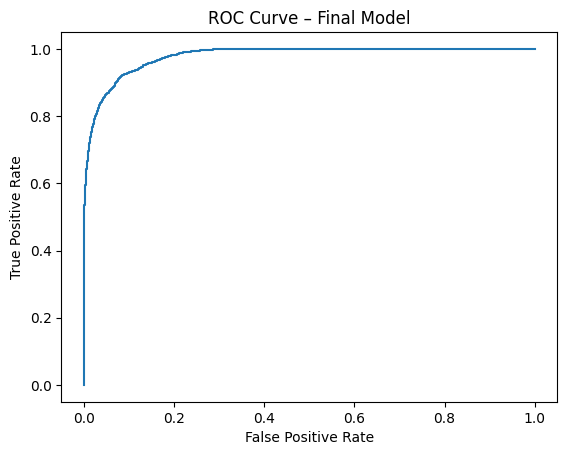

In [57]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Final Model")
plt.show()

In [58]:
# predicting
new_customer = {
    "person_age": 32,
    "person_income": 550000,
    "person_emp_exp": 6,
    "loan_amnt": 200000,
    "loan_int_rate": 12.5,
    "loan_percent_income": 0.36,
    "cb_person_cred_hist_length": 8,
    "credit_score": 720,
    "person_gender": "female",
    "person_education": "Graduate",
    "person_home_ownership": "RENT",
    "loan_intent": "PERSONAL",
    "previous_loan_defaults_on_file": "No"
}

import pandas as pd
new_df = pd.DataFrame([new_customer])

# columns used during training
trained_columns = x.columns

new_df = pd.DataFrame([new_customer])

new_df_encoded = pd.get_dummies(new_df)
# Align columns with training data
new_df_encoded = new_df_encoded.reindex(
    columns=trained_columns,
    fill_value=0
)

prob = final_model.predict_proba(new_df_encoded)[0][1]
print("Default Probability:", round(prob, 4))

threshold = 0.4  # chosen earlier
status = "DEFAULT" if prob >= threshold else "NON-DEFAULT"
print("Loan Status:", status)

# from sklearn.pipeline import Pipeline
# new_df_processed = pipeline.transform(new_df)

# prob = final_model.predict_proba(new_df_processed)[0][1]
# print("Default Probability:", round(prob, 4))

# threshold = 0.4  # chosen earlier
# status = "DEFAULT" if prob >= threshold else "NON-DEFAULT"
# print("Loan Status:", status)

# if status == "DEFAULT":
#     print("⚠️ High risk applicant. Loan approval not recommended.")
# else:
#     print("✅ Low risk applicant. Loan can be approved.")

Default Probability: 0.0615
Loan Status: NON-DEFAULT


In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, final_model.predict(x_test))
# Recall (defaulters)
# 1617/(1617+393)≈0.804
# Precision (defaulters)
# 1617/(1617+189)≈0.90 

array([[6801,  189],
       [ 393, 1617]])

In [ ]:
def predict_loan_status(model, input_data, threshold=0.45):
    prob = model.predict_proba(input_data)[0][1]
    status = 1 if prob >= threshold else 0
    return {
        "default_probability": prob,
        "loan_status": status
    }
    # This is API-ready logic (Flask / Streamlit).

In [61]:
import pandas as pd
sample = pd.DataFrame([{
    'previous_loan_defaults_on_file': 0,
    'loan_int_rate': 12.5,
    'loan_percent_income': 0.28,
    'person_income': 45000,
    'person_home_ownership': 1,
    'loan_intent': 2,
    'credit_score': 680,
    'loan_amnt': 15000
}])
predict_loan_status(final_model, sample)

ValueError: feature_names mismatch: ['person_age', 'person_gender', 'person_education', 'person_income', 'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score', 'previous_loan_defaults_on_file'] ['previous_loan_defaults_on_file', 'loan_int_rate', 'loan_percent_income', 'person_income', 'person_home_ownership', 'loan_intent', 'credit_score', 'loan_amnt']
expected person_education, person_gender, cb_person_cred_hist_length, person_emp_exp, person_age in input data

In [ ]:
# reduced features
Xr = x[[
    'previous_loan_defaults_on_file',
    'loan_int_rate',
    'loan_percent_income',
    'person_income',
    'person_home_ownership',
    'loan_intent',
    'credit_score',
    'loan_amnt'
]]
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)
xgb_final = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    # scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    random_state=42
)
xgb_final.fit(Xr_train, yr_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
customer = {
    'previous_loan_defaults_on_file': 0,
    'loan_int_rate': 12.5,
    'loan_percent_income': 0.28,
    'person_income': 45000,
    'person_home_ownership': 1,
    'loan_intent': 2,
    'credit_score': 680,
    'loan_amnt': 15000
}

In [ ]:
model = joblib.load("loan_default_xgb_reduced.pkl")
features = joblib.load("loan_default_features.pkl")

df = pd.DataFrame([customer])[features]
prob = model.predict_proba(df)[0][1]

In [ ]:
import pandas as pd
df = pd.DataFrame([customer])[features]

In [ ]:
prob = model.predict_proba(df)[0][1]
# status = "DEFAULT" if prob >= 0.40 else "NON-DEFAULT"            #more protection , catches more defaulters , higher recall
status = "DEFAULT" if prob >= 0.55 else "NON-DEFAULT"              # fewer false rejections
# status = "DEFAULT" if prob >= 0.45 else "NON-DEFAULT"
print("Default Probability:", round(prob, 3))
print("Loan Status:", status)

Default Probability: 0.603
Loan Status: DEFAULT


In [ ]:
# status = "DEFAULT" if prob >= 0.40 else "NON-DEFAULT"
# status = "DEFAULT" if prob >= 0.55 else "NON-DEFAULT"

In [ ]:
import joblib
joblib.dump(xgb_final, "extraloan_default_xgb_reduced.pkl")
joblib.dump(Xr.columns.tolist(), "extraloan_default_features.pkl")

['extraloan_default_features.pkl']

In [ ]:
# y_pred = (y_prob >= 0.45).astype(int)

In [ ]:
# y_pred = (y_prob >= 0.55).astype(int)

In [ ]:
import numpy as np
from sklearn.metrics import recall_score, precision_score

thresholds = np.arange(0.30, 0.61, 0.05)

for t in thresholds:
    y_pred_t = (y_prob >= t).astype(int)
    recall = recall_score(y_test, y_pred_t)
    precision = precision_score(y_test, y_pred_t)
    print(f"Threshold={t:.2f} | Recall={recall:.3f} | Precision={precision:.3f}")
    # “The decision threshold was tuned to 0.45 to balance recall and precision,
    # prioritizing detection of loan defaulters while maintaining acceptable false-positive rates.”


Threshold=0.30 | Recall=0.889 | Precision=0.794
Threshold=0.35 | Recall=0.868 | Precision=0.827
Threshold=0.40 | Recall=0.849 | Precision=0.858
Threshold=0.45 | Recall=0.824 | Precision=0.879
Threshold=0.50 | Recall=0.804 | Precision=0.895
Threshold=0.55 | Recall=0.786 | Precision=0.909
Threshold=0.60 | Recall=0.764 | Precision=0.921


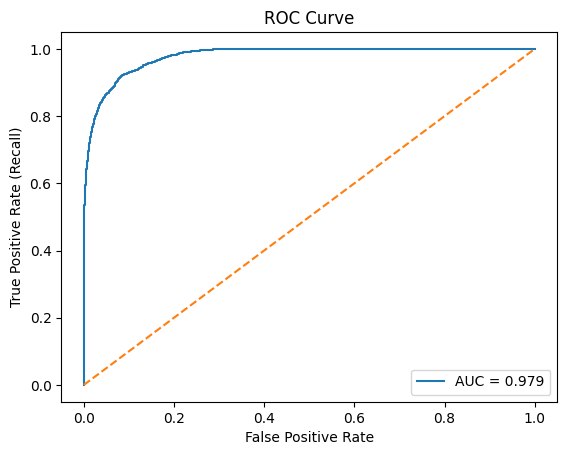

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# predicted probabilities for class 1
y_prob = final_model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--')  # random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [ ]:
xr = x_reduced

xr_train, Xr_test, yr_train, yr_test = train_test_split(
    xr, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

xgb_reduced = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    eval_metric='logloss',
    random_state=42
)

xgb_reduced.fit(xr_train, yr_train)

from sklearn.metrics import accuracy_score, recall_score
y_pred_r = xgb_reduced.predict(Xr_test)
y_prob_r = xgb_reduced.predict_proba(Xr_test)[:,1]
print("Reduced Accuracy:", accuracy_score(yr_test, y_pred_r))
print("Reduced Recall:", recall_score(yr_test, y_pred_r))

Reduced Accuracy: 0.9336666666666666
Reduced Recall: 0.797


In [ ]:
def predict_loan(model, data):
    prob = model.predict_proba(data)[0][1]
    status = int(prob >= FINAL_THRESHOLD)
    return prob, status

In [ ]:
import joblib
joblib.dump(xgb_reduced, "loan_default_xgb_reduced.pkl")
joblib.dump(final_features, "loan_default_features.pkl")

NameError: name 'final_features' is not defined

In [ ]:
# from sklearn.metrics import accuracy_score, classification_report
# y_pred = model.predict(x_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score, roc_curve, auc
# from sklearn.model_selection import train_test_split,GridSearchCV

# X = training_data[features].iloc[:,:-1]
# y = training_data[features].iloc[:,-1]

# dt = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=50, min_samples_split=10,class_weight='balanced')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
# dt = dt.fit(X_train, y_train)
# y_pred_train = dt.predict(X_train)
# y_pred_test = dt.predict(X_test)

# print("Trainig Accuracy: %.5f" %accuracy_score(y_train, y_pred_train))
# print("Test Accuracy: %.5f" %accuracy_score(y_test, y_pred_test))

# params_list = {'min_samples_leaf':[50,100,150,200,250],'min_samples_split':[10,11,12,13,14,15,20]}

# grid_search_dt = GridSearchCV(dt,param_grid=params_list,cv=3)

# grid_search_dt.fit(X_train,y_train)

# best_dt = DecisionTreeClassifier(min_samples_leaf=100,min_samples_split=10)

# best_dt.fit(X_train,y_train)
# y_pred_train = best_dt.predict(X_train)
# y_pred_test = best_dt.predict(X_test)
# print("Trainig Accuracy after Hyperparameter Tuning: %.5f" %accuracy_score(y_train, y_pred_train))
# print("Test Accuracy after Hyperparameter Tuning: %.5f" %accuracy_score(y_test, y_pred_test))

# print("Training Precision: %.5f" %precision_score(y_train,y_pred_train))
# print("Testing Precision: %.5f" %precision_score(y_test,y_pred_test))
# print("Training Recall: %.5f" %recall_score(y_train,y_pred_train))
# print("Training Recall: %.5f" %recall_score(y_test,y_pred_test))

In [ ]:
#  hyper parameters for decision tree classifier
# params_list = {'min_samples_leaf':[50,100,150,200,250],'min_samples_split':[10,11,12,13,14,15,20]}
# grid_search_dt = GridSearchCV(dt,param_grid=params_list,cv=3)
# grid_search_dt.fit(X_train,y_train)
# best_dt = DecisionTreeClassifier(min_samples_leaf=100,min_samples_split=10)
# best_dt.fit(X_train,y_train)
# y_pred_train = best_dt.predict(X_train)
# y_pred_test = best_dt.predict(X_test)
# print("Trainig Accuracy after Hyperparameter Tuning: %.5f" %accuracy_score(y_train, y_pred_train))
# print("Test Accuracy after Hyperparameter Tuning: %.5f" %accuracy_score(y_test, y_pred_test))
# Trainig Accuracy after Hyperparameter Tuning: 0.83240
# Test Accuracy after Hyperparameter Tuning: 0.83095

In [ ]:
# this is how i can draw curve for model i predicted

# sns.set_style("whitegrid", {'axes.grid' : False})
# scores_train = rf.predict_proba(X_train)
# scores_test = rf.predict_proba(X_test)
# y_scores_train = []
# y_scores_test = []
# for i in range(len(scores_train)):
#     y_scores_train.append(scores_train[i][1])

# for i in range(len(scores_test)):
#     y_scores_test.append(scores_test[i][1])
    
# fpr_rf_train, tpr_rf_train, _ = roc_curve(y_train, y_scores_train, pos_label=1)
# fpr_rf_test, tpr_rf_test, _ = roc_curve(y_test, y_scores_test, pos_label=1)

# plt.plot(fpr_rf_train, tpr_rf_train, color='darkblue', label='Train AUC: %5f' %auc(fpr_rf_train, tpr_rf_train))
# plt.plot(fpr_rf_test, tpr_rf_test, color='red', ls='--', label='Test AUC: %5f' %auc(fpr_rf_test, tpr_rf_test))
# plt.title("XG Boost ROC Curve")
# plt.xlabel("False Positive Rate (FPR)")
# plt.ylabel("True Positive Rate (TPR)")
# plt.legend(loc='lower right')